
**STOCK MARKET PREDICTION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_index = pd.read_csv('/kaggle/input/stock-exchange-data/indexData.csv')
df_index

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [4]:
df_info=pd.read_csv("/kaggle/input/stock-exchange-data/indexInfo.csv")
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [5]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [6]:
df_index.isna().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [7]:
print(df_index.dtypes)


Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [8]:
for col in df_index.select_dtypes(include=['number']).columns:
    df_index[col] = df_index[col].fillna(df_index[col].median())


In [9]:
for col in df_index.select_dtypes(include=['object']).columns:
    df_index[col] = df_index[col].fillna(df_index[col].mode()[0])


In [10]:
df_index.isna().sum().sum()

0

In [11]:
df_index['Date'] = pd.to_datetime(df_index['Date'])

In [12]:
df_index['Price Change'] = df_index['Close'] - df_index['Open']  # Difference between Open and Close
df_index['Lag_Close'] = df_index['Close'].shift(1)

In [13]:
df_index.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price Change', 'Lag_Close'],
      dtype='object')

In [14]:
df_index['Price Change']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
112452    5.949951
112453    7.130005
112454   -7.149902
112455    3.969971
112456    5.130005
Name: Price Change, Length: 112457, dtype: float64

**FEATURE ENGINEERING**

In [15]:
merged_data = pd.merge(df_index, df_info, on='Index', how='inner')

In [16]:
merged_data['AveragePrice'] = (merged_data['High'] + merged_data['Low']) / 2

In [17]:
output_path="indexProcessed.csv"
merged_data.to_csv(output_path,index=False)

In [18]:
print(f"Processed file saved to: {output_path}")

Processed file saved to: indexProcessed.csv


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [20]:
features=['Open','High','Low','Volume']
target='Close'
X=merged_data[features]
y=merged_data[target]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

In [24]:
results={}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

In [25]:
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()


Linear Regression:
  MAE: 21.6571
  MSE: 2293.4858
  R2: 1.0000

Random Forest:
  MAE: 23.9684
  MSE: 3115.5634
  R2: 1.0000

Gradient Boosting:
  MAE: 62.6013
  MSE: 10604.2134
  R2: 0.9999

KNN:
  MAE: 1911.0503
  MSE: 15793299.5096
  R2: 0.7978

SVR:
  MAE: 5194.0084
  MSE: 81255247.3726
  R2: -0.0405



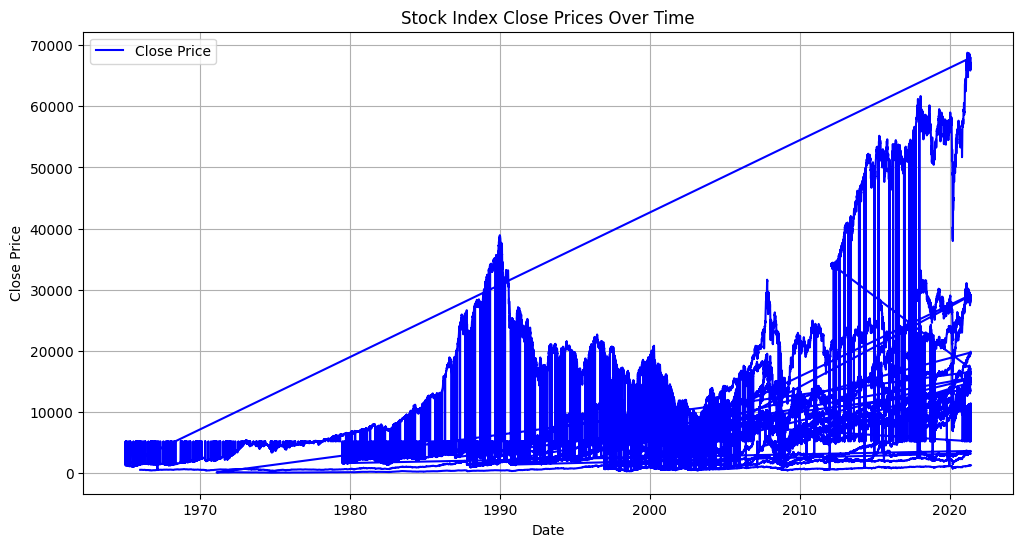

In [26]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Time-series plot for 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Close'], label='Close Price', color='blue')
plt.title('Stock Index Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

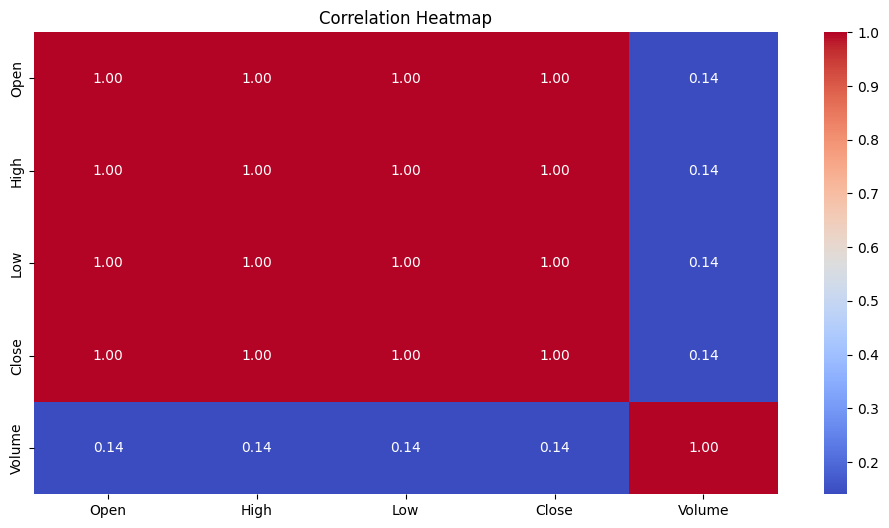

In [27]:
plt.figure(figsize=(12,6))
correlation = merged_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



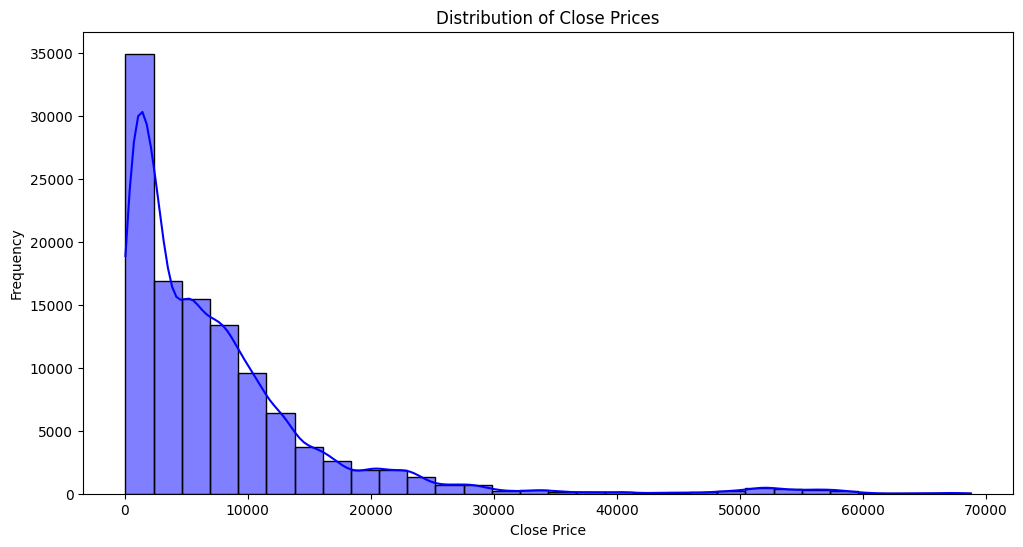

In [28]:
# Distribution plot for 'Close' prices
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['Close'], kde=True, color='blue', bins=30)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()



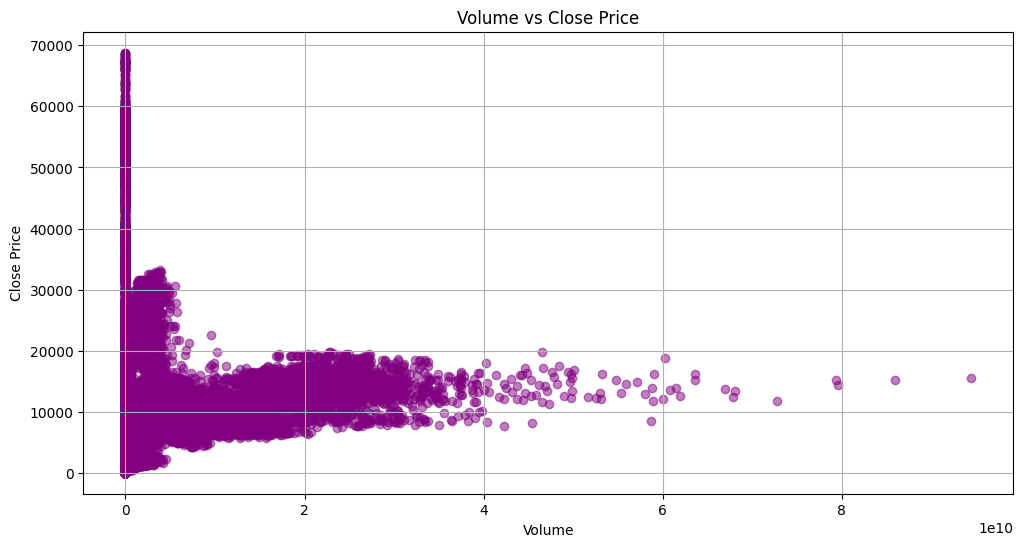

In [29]:
# Scatter plot: 'Volume' vs 'Close'
plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Volume'], merged_data['Close'], alpha=0.5, color='purple')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid()
plt.show()

In [30]:
from sklearn.cluster import KMeans

In [31]:
K_means=KMeans(n_clusters=8,init="k-means++",random_state=100)
K_means.fit(X)

KMeans(random_state=100)

In [32]:
print(f"The cluster is {K_means.cluster_centers_}")
print(f"The label is {K_means.labels_}")

The cluster is [[1.05743121e+04 1.06317838e+04 1.05053636e+04 1.91856936e+09]
 [1.39654835e+04 1.40323357e+04 1.38789520e+04 2.24917619e+10]
 [6.89625275e+03 6.93861761e+03 6.85059807e+03 4.66245380e+07]
 [1.41091151e+04 1.42581272e+04 1.39094939e+04 5.35575224e+10]
 [9.08084730e+03 9.12663653e+03 9.02754120e+03 1.07439381e+10]
 [1.01431705e+04 1.02103438e+04 1.00660968e+04 4.63692228e+09]
 [1.36649779e+04 1.37746163e+04 1.35245789e+04 3.05193308e+10]
 [1.28184505e+04 1.28732187e+04 1.27604904e+04 1.69785397e+10]]
The label is [2 2 2 ... 2 2 2]


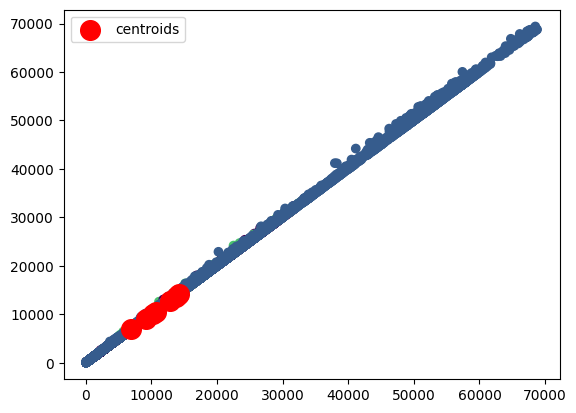

In [33]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=K_means.labels_, cmap='viridis')
plt.scatter(K_means.cluster_centers_[:, 1], K_means.cluster_centers_[:, 0], s=200, c='red', label='centroids')
plt.legend()
plt.show()
